In [1]:
run Lattice_functions.ipynb

In [2]:
import os
from functools import partial

path = os.getcwd()

np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [3]:
#Generating the lattice
nx = 20 + 1 # 1 added to make the total length = 20*0.01
ny = 20 + 1
lx = 0.05
ly = 0.05
k_inPlane = 7e4
nz = 3
lz = 0.01
k_vertical = 1e8 # to enzure strain in z direction is close to zero
M1 = Rect_Lattice(nx, ny, lx, ly, k_inPlane, [], [], [])
M1 = add_layers_in_z_direction(M1, nz, lz, k_vertical, 0, [])

#setting z of the middle layer to zero and deriving support criterias:
min_x = M1.nodes[1].x
min_y = M1.nodes[1].y
max_x = M1.nodes[1].x
max_y = M1.nodes[1].y

for i in M1.nodes:
    i.z = round(i.z, 12) - lz
    i.x = round(i.x, 12)
    i.y = round(i.y, 12)
    min_x = min(i.x, min_x)
    min_y = min(i.y, min_y)
    max_x = max(i.x, max_x)
    max_y = max(i.y, max_y)

#Adding support
for i in M1.nodes:
    if(i.z == 0):
        if(i.x == min_x or i.x == max_x or i.y == min_y or i.y == max_y):
            i.s_x = 1
            i.s_y = 1
            i.s_z = 1
            M1.support_x.append(i.n)
            M1.support_y.append(i.n)
            M1.support_z.append(i.n)


mid_node = int(nx*ny + (nx*ny + 1)/2) #Only for odd nx and ny

In [4]:
x0 = []
y0 = []
z0 = []
for i in M1.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)
    
coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3)

#ax = Lattice_Plot(x0, y0, z0, M1, [], 'XsY', 25, 8, 0.1, 'M1_type_c_3D')

In [5]:
forces_M1_AE = np.load(path + '/Model 1/c/forces_M1_AE.npy')
forces_M1 = np.load(path + '/Model 1/c/forces_M1.npy')
z_centre_M1 = np.load(path + '/Model 1/c/z_centre_M1.npy')
z_centre_M1_AE = np.load(path + '/Model 1/c/z_centre_M1_AE.npy')

In [6]:
#Equalizing the z for 2kN load
z_centre_M1 = -(-1*0.016312/z_centre_M1[4])*z_centre_M1
z_centre_M1_AE = -(-1*0.016312/z_centre_M1_AE[4])*z_centre_M1_AE

In [7]:
w_FSDT = FSDPT_point_load_at_centre(2e6, 0.25, 0.02, 1, 1, 5/6, forces_M1, 20, 20)
w_FSDT = np.array(w_FSDT)

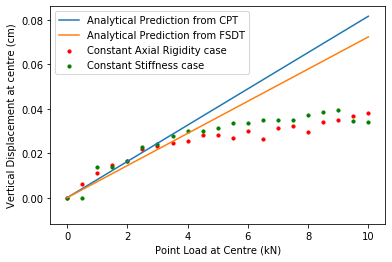

In [10]:
plt.scatter(forces_M1_AE, z_centre_M1_AE, c='r',s=10, label = "Constant Axial Rigidity case")
plt.scatter(forces_M1, z_centre_M1, c='g',s=10, label = "Constant Stiffness case")
plt.plot(forces_M1, 0.008156*forces_M1, label = "Analytical Prediction from CPT")
plt.plot(forces_M1, w_FSDT, label = "Analytical Prediction from FSDT")
plt.xlabel('Point Load at Centre (kN)') 
plt.ylabel('Vertical Displacement at centre (cm)')
plt.legend()
#plt.title ('Model 1 - Type A - vertical Displacement with repspect to Point Load at centre')
plt.savefig('M1_c_plt.png', dpi=300)
plt.show()

In [8]:
data_M1 = np.load(path + '/Model 1/c/data_M1.npy')
data_M1_AE = np.load(path + '/Model 1/c/data_M1_AE.npy')

In [9]:
#Strain epsilon zz at the centre of the plate
mid_node = int(nx*ny + (nx*ny + 1)/2)
z_mid_node = 2*nNodes + mid_node - 1
epsilon_zz_vec = []
epsilon_zz_AE_vec = []
for i in range(0, len(data_M1)):
    epsilon = -100*(1 - (data_M1[i][2*nNodes + mid_node - 1 + nx*ny] - data_M1[i][2*nNodes + mid_node - 1 - nx*ny])/0.02)
    epsilon_AE = -100*(1 - (data_M1_AE[i][2*nNodes + mid_node - 1 + nx*ny] - data_M1_AE[i][2*nNodes + mid_node - 1 - nx*ny])/0.02)
    epsilon_zz_vec.append(epsilon)
    epsilon_zz_AE_vec.append(epsilon_AE)

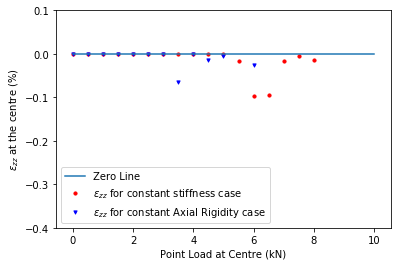

In [20]:
from matplotlib import rc
plt.scatter(forces_M1_AE, epsilon_zz_vec, c='r',s=10, label = "$\epsilon_{zz}$ for constant stiffness case")
plt.scatter(forces_M1_AE, epsilon_zz_AE_vec, marker = 'v', c='b',s=10, label = "$\epsilon_{zz}$ for constant Axial Rigidity case")
plt.plot(forces_M1, np.zeros(len(forces_M1)), label = "Zero Line")
plt.xlabel('Point Load at Centre (kN)') 
plt.ylabel('$\epsilon_{zz}$ at the centre (%)')
plt.ylim(-0.40,0.1)
plt.legend()
plt.savefig('M1_c_strain.png', dpi=300, bbox_inches = "tight")


In [10]:
#energy before and after
#setting z of the middle layer to zero and deriving support criterias:
min_x = M1.nodes[1].x
min_y = M1.nodes[1].y
max_x = M1.nodes[1].x
max_y = M1.nodes[1].y

for i in M1.nodes:
    i.z = round(i.z, 12) - lz
    i.x = round(i.x, 12)
    i.y = round(i.y, 12)
    min_x = min(i.x, min_x)
    min_y = min(i.y, min_y)
    max_x = max(i.x, max_x)
    max_y = max(i.y, max_y)

#Adding support
for i in M1.nodes:
    if(i.z == 0):
        if(i.x == min_x or i.x == max_x or i.y == min_y or i.y == max_y):
            i.s_x = 1
            i.s_y = 1
            i.s_z = 1
            M1.support_x.append(i.n)
            M1.support_y.append(i.n)
            M1.support_z.append(i.n)

f0 = Point_load_at_centre(0.5, M1)

In [11]:
energies_M1 = np.load(path + '/Model 1/c/energies_M1.npy')
energies_M1_AE = np.load(path + '/Model 1/c/energies_M1_AE.npy')
E_before = []
for i in range(1, 22):
    print(i)
    f = (i - 1)*f0
    E_before.append(Energy(coord0, f, M1))
    
for i in range(1, len(energies_M1)):
    energies_M1[i] = energies_M1[i] - E_before[i]
    energies_M1_AE[i] = energies_M1_AE[i] - E_before[i]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


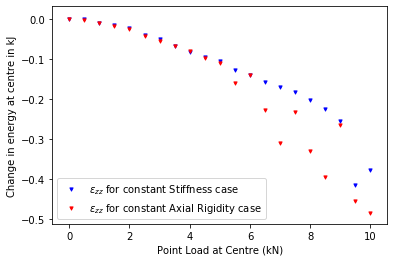

In [25]:
from matplotlib import rc
#plt.scatter(forces_M1_AE_5x5, E_before, c='r',s=10, label = "$\epsilon_{zz}$ for constant stiffness case")
plt.scatter(forces_M1_AE, energies_M1, marker = 'v', c='b',s=10, label = "$\epsilon_{zz}$ for constant Stiffness case")
plt.scatter(forces_M1_AE, energies_M1_AE, marker = 'v', c='r',s=10, label = "$\epsilon_{zz}$ for constant Axial Rigidity case")
#plt.plot(forces_M1_5x5, 0*np.ones(len(forces_M1_5x5)), label = "Energy in undef")
plt.xlabel('Point Load at Centre (kN)') 
plt.ylabel('Change in energy at centre in kJ')
#plt.ylim(-0.0050+1e2,0.001+1e2)
plt.legend()
plt.savefig('M1_c_energy.png', dpi=300, bbox_inches = "tight")


In [12]:
epsilon_zz_vec

[-0.0,
 -2.8294001863660156e-05,
 -4.995535254348482e-05,
 -7.495652409872378e-05,
 -9.995357377334813e-05,
 -0.0001250667945984496,
 -0.00015046710183375112,
 -0.00017765217517062837,
 -0.0009186468605482112,
 -0.0006226773857087586,
 -0.0013164157008249688,
 -0.016898855310121252,
 -0.0976912967266319,
 -0.09453019188553347,
 -0.01737221176538739,
 -0.003870055776578063,
 -0.014196003978939054,
 -0.45236357065872035,
 -7.163672579320046,
 -91.67136221427995,
 -66.21898060891897]

In [13]:
epsilon_zz_AE_vec

[-0.0,
 -6.247313537599553e-05,
 -0.00012500127117842652,
 -0.00018734201692183206,
 -0.0002500638783375919,
 -0.0003999612133487318,
 -0.0003762571292864614,
 -0.06447396223874247,
 -0.0012025831701456546,
 -0.013134219544552739,
 -0.005826409076770123,
 -53.18038706927217,
 -0.026309423293191525,
 -70.57990965687199,
 -98.66347821152554,
 -54.11846215096683,
 -90.23484271391476,
 -99.97101008957632,
 -31.27623827991498,
 -99.74069894068236,
 -99.92185706339649]

In [ ]:
np.load = np_load_old